Entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
# Carregando os arquivos
corridas = pd.read_csv('/datasets/project_sql_result_01.csv')
bairros = pd.read_csv('/datasets/project_sql_result_04.csv')


# Tabela Corridas

In [ ]:
# Tabela Corridas
corridas

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [ ]:
corridas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
corridas.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [ ]:
# Verificando dados Faltantes
corridas.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
corridas.duplicated()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


* DF sem dados faltante ou duplicados

<AxesSubplot:xlabel='trips_amount', ylabel='company_name'>

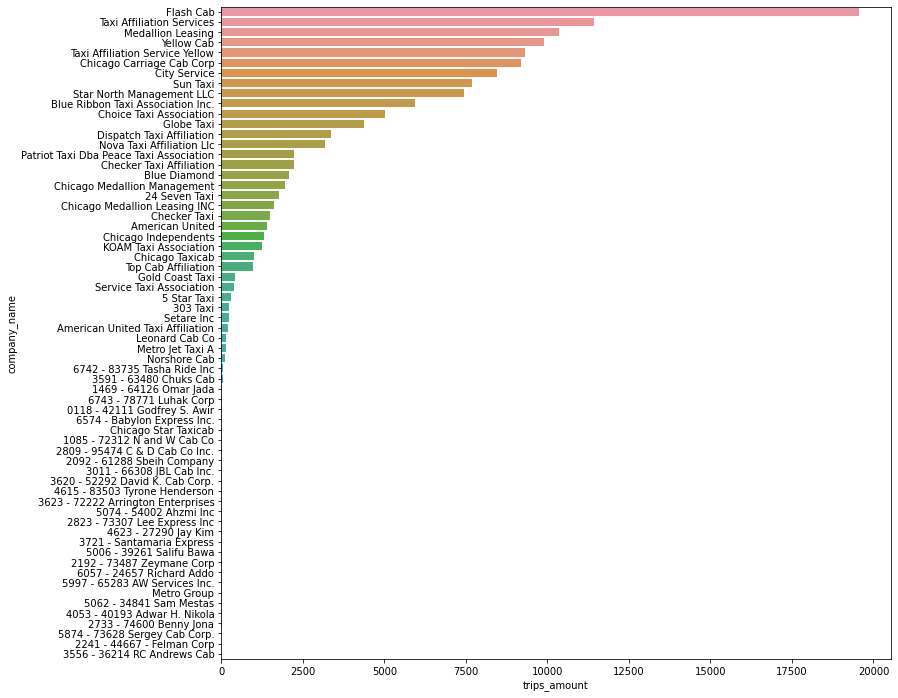

In [ ]:
# Plotando gráfico de quantidade de corridas por companhia de taxi
f, ax = plt.subplots(figsize=(12, 12), sharex=True)
sns.barplot(data=corridas, x='trips_amount',y='company_name', orient = 'h', ax = ax)

* É possível perceber que a compania Flash Cab é a que possui maior quantidade de corridas, seguida pela Taxi Affiliation Services e Medallion Leasing.

# Tabela bairros

In [ ]:
bairros

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [ ]:
bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
bairros.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [ ]:
# Verificando dados Faltantes
bairros.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
bairros.duplicated()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


* DF sem dados faltante ou duplicados

In [ ]:
bairros = bairros.sort_values(by='average_trips', ascending=False)
bairros[:11]

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='average_trips', ylabel='dropoff_location_name'>

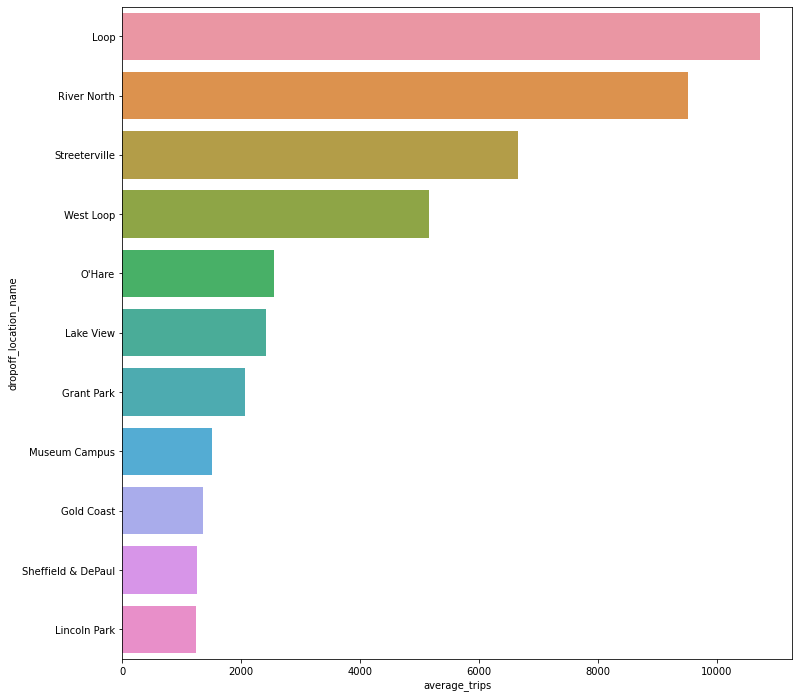

In [ ]:
# Plotando gráfico da quantidade média de viagens por bairro
f, ax = plt.subplots(figsize=(12, 12), sharex=True)
sns.barplot(data=bairros[:11], x='average_trips',y='dropoff_location_name', orient = 'h', ax = ax)

* É visível que os 4 primeiros bairros concentram as maiores médias de viagem no período analisado
* A partir do 5º bairro os números começam a cair mais de 50%, mostrando que o top 4 são os destinos mais procurados

# DF Viagens

In [ ]:
viagens = pd.read_csv('/datasets/project_sql_result_07.csv')
viagens

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [ ]:
# Transformando a coluna para tipo datetime
viagens['start_ts'] = pd.to_datetime(viagens['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Criando uma coluna com o dia da semana correspondente à data
viagens['weekday'] = viagens['start_ts'].dt.weekday
viagens

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [ ]:
viagens_good = viagens.query('weather_conditions == "Good"')
viagens_good

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,5
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5


In [ ]:
viagens_bad = viagens.query('weather_conditions == "Bad"')
viagens_bad

,start_ts,weather_conditions,duration_seconds,weekday
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5
1032,2017-11-18 10:00:00,Bad,1908.0,5
1053,2017-11-18 12:00:00,Bad,2400.0,5
1061,2017-11-18 16:00:00,Bad,2186.0,5


## Testando hipótese

### Hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare é igual em sábados com tempo bom e ruim

### Hipótese Alternativa: A duração média dos passeios do Loop para o Aeroporto Internacional é diferente em sábado com tempo ruim.

In [ ]:
alpha = 0.05

results = st.ttest_ind(viagens_good['duration_seconds'], viagens_bad['duration_seconds'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value:  6.517970327099473e-12
Rejeitamos a hipótese nula


Podemos rejeitar a hipótese nula, ou seja, podemos rejeitar que o tempo médio da viagem nos sábados independem se a condição do tempo é boa ou ruim.

Para testar esta hipótese utilizei o método de Igualdade entre as médias de duas populações, principalmente devido ao fato da diferença de tamanho entre os conjuntos de dados, caso estivessem iguais, teria utilizado o dados da mesma população onde a diferenã entre elas seriam a condição de tempo.